# Part 1: Temporal Patterns

Import the used packages.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load the historical police incidence reports, 2003 to may 2018 and subselect the relevant focus-crimes.

In [7]:
# Change to your own path.
policedata = pd.read_csv(r'C:\Users\Bruger\Desktop\LargeDataFiles\Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
# Generate and add a DateTime variable to the dataset.
policedata['DateTime'] = policedata['Date'] + ' ' + policedata['Time']
policedata['DateTime'] = pd.to_datetime(policedata['DateTime'] , format="%m/%d/%Y %H:%M") 

# Select the relevant focus-crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
fcdata = policedata[policedata['Category'].isin(list(focuscrimes))]

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?

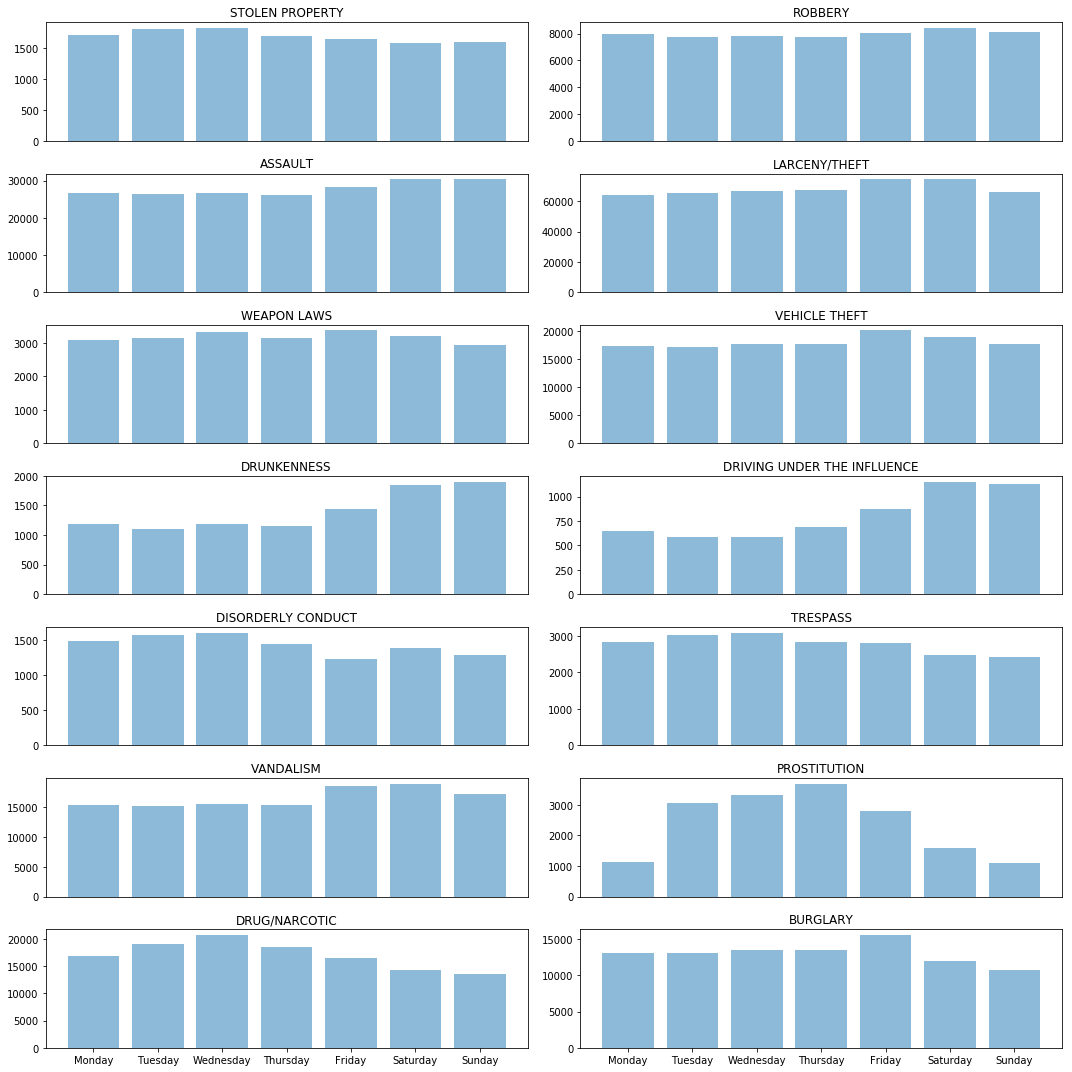

In [24]:
fig = plt.figure(figsize=(15,15))
plotidx = 1
for crimecat in list(focuscrimes):
    crimetype = fcdata[fcdata['Category'] == crimecat]
    groupedcrimetype = crimetype.groupby(crimetype.DateTime.dt.weekday).count()
    fig.add_subplot(7,2,plotidx)
    plt.bar(groupedcrimetype['IncidntNum'].index, groupedcrimetype['IncidntNum'].values, align='center', alpha=0.5)
    if plotidx == 13 or plotidx == 14:
        bars = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday')
        y_pos = np.arange(len(bars))
        plt.xticks(y_pos, bars)
    else:
        plt.xticks([])
    plt.title(crimecat)
    plt.tight_layout()
    plotidx += 1
    
    ## COMMENT FOR ALESSANDRO AND ALEX:
    # Should i change the plots to be average daily rather than accumulated daily over all data?

From the barcharts it is clear that some crimes are much more frequent than others, as seen when looking on the values on the y-axis on each barchart. Here we see that Larceny/Theft is much more frequent, compared to for example Drunkenness.
Additionally it is seen that some crimes are very subject to changes in frequency throughout the week whereas others are not. Looking at Prostitution there is a clear peak at the middle of the week, while crimes such as Drunkenness and Driving under the inlfuence are more common during weekeneds.

* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

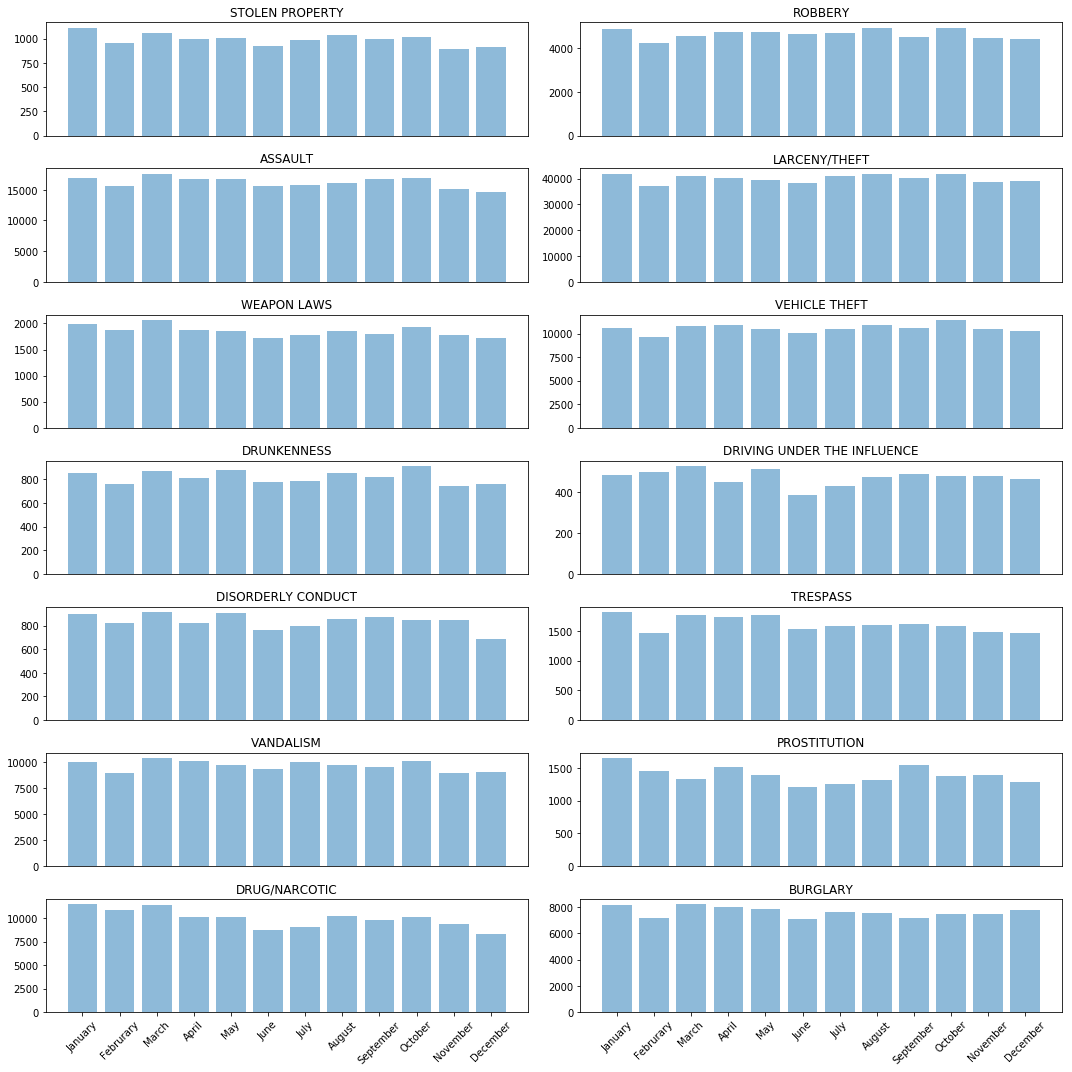

In [32]:
fig = plt.figure(figsize=(15,15))
plotidx = 1
for crimecat in list(focuscrimes):
    crimetype = fcdata[fcdata['Category'] == crimecat]
    groupedcrimetype = crimetype.groupby(crimetype.DateTime.dt.month).count()
    fig.add_subplot(7,2,plotidx)
    plt.bar(groupedcrimetype['IncidntNum'].index, groupedcrimetype['IncidntNum'].values, align='center', alpha=0.5)
    if plotidx == 13 or plotidx == 14:
        bars = ('January', 'Februrary', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December')
        y_pos = np.arange(1,len(bars)+1)
        plt.xticks(y_pos, bars)
        plt.xticks(rotation=45) 
    else:
        plt.xticks([])
    plt.title(crimecat)
    plt.tight_layout()
    plotidx += 1

From the barcharts it is clear that some crimes are more subject frequent at varying times of the year. When judging across all crimes it appearst that the least frequent periods of crimes (or arrests) is during the summer. This is especially true for Prostitution and Drug/Narcotic - perhaps the lacking shroud of darkness keeps criminals at bay, or policemen like to take vacations in the summer and are therefore understaffed. February also generally has fewer arrests than the surrounding months, which is likely due to the month being shorter.

* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

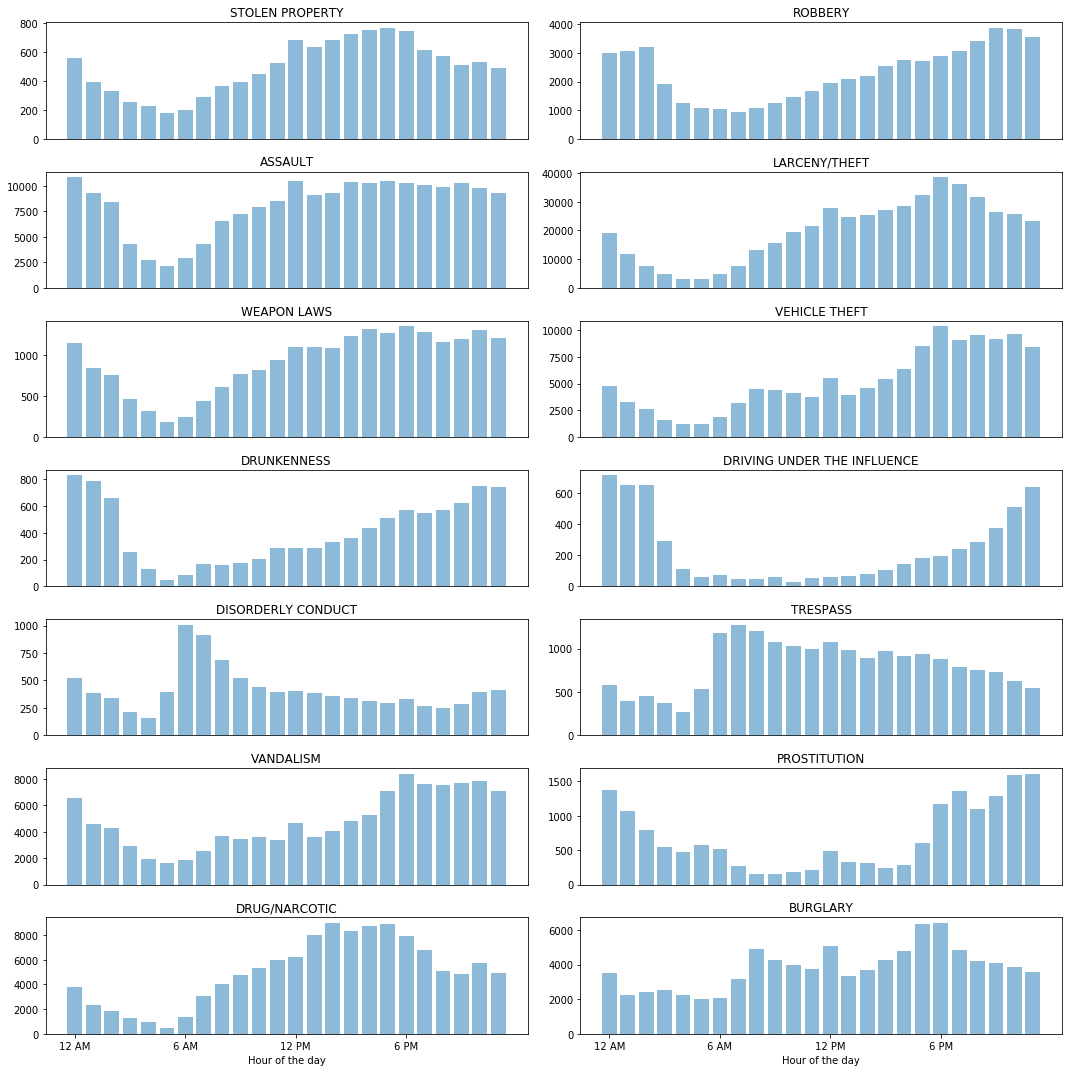

In [39]:
fig = plt.figure(figsize=(15,15))
plotidx = 1
for crimecat in list(focuscrimes):
    crimetype = fcdata[fcdata['Category'] == crimecat]
    groupedcrimetype = crimetype.groupby(crimetype.DateTime.dt.hour).count()
    fig.add_subplot(7,2,plotidx)
    plt.bar(groupedcrimetype['IncidntNum'].index, groupedcrimetype['IncidntNum'].values, align='center', alpha=0.5)
    plt.title(crimecat)
    if plotidx == 13 or plotidx == 14:
        plt.xlabel("Hour of the day")
        bars = ('12 AM', '6 AM', '12 PM', '6 PM')
        y_pos = (0,6,12,18)
        plt.xticks(y_pos, bars)
    else:
        plt.xticks([])
    plt.tight_layout()
    plotidx += 1

From the barchart we see that the hour of the day has a big impact on the occurences of a particular crime. For most of the crimes it seems that nighttime and early mornings are the most frequent times for the crimes. Looking at Driving under the influence this pattern is especially clear, since there are almost no arrest during the daytime. Trespassing and Disorderly Conduct is more common during the morning hours after 5 AM. Looking at burglary there seem to be two peaks, a larger one around 6 PM, and a smaller one around 12 PM - perhaps the earlier burglaries are related to peoples houses when they are out of house, and the later ones are associated with burglary of workplaces when workers are out of office.

* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


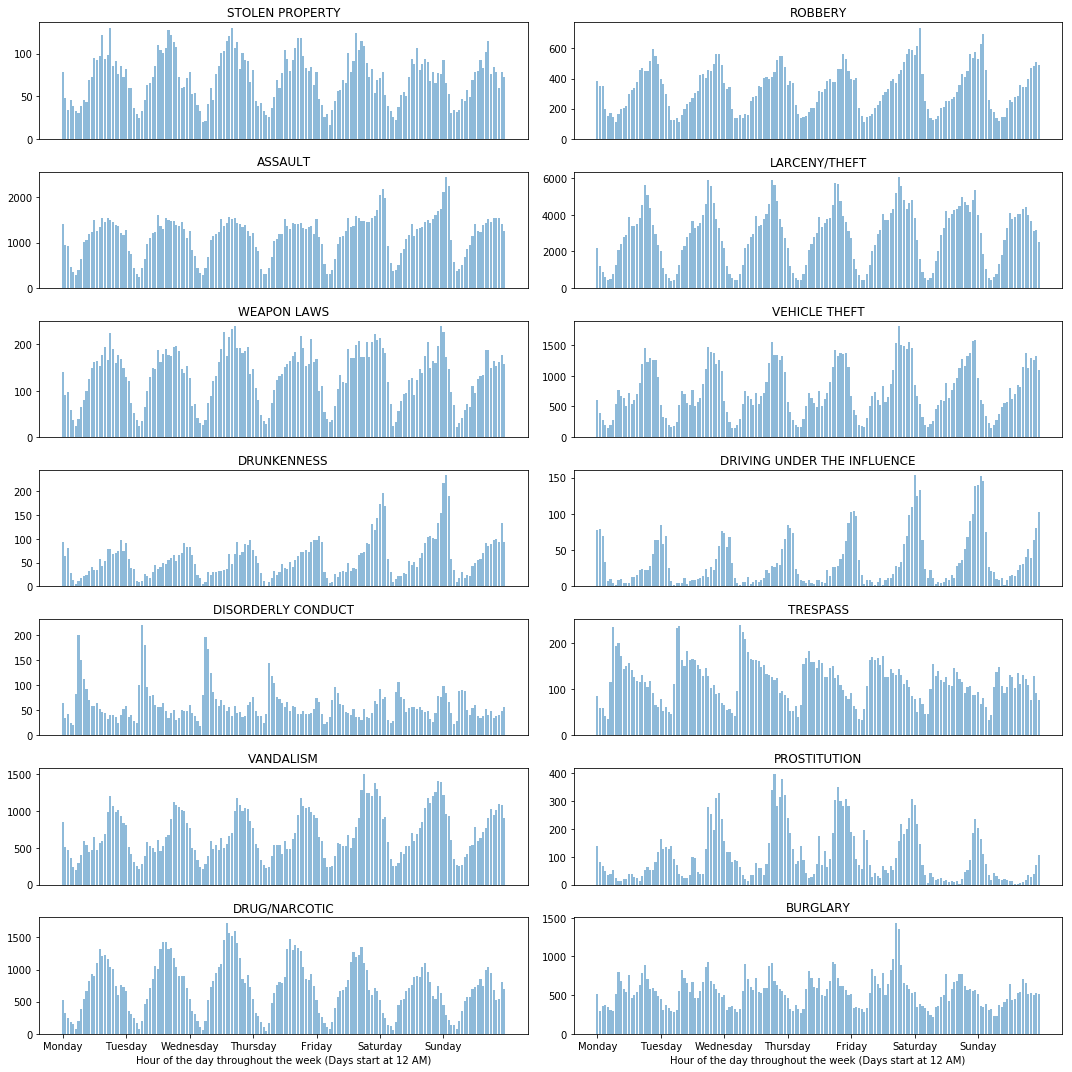

In [49]:
fig = plt.figure(figsize=(15,15))

plotidx = 1
for crimecat in list(focuscrimes):
    crimetype = fcdata[fcdata['Category'] == crimecat]
    groupedcrimetype = crimetype.groupby([crimetype.DateTime.dt.dayofweek , crimetype.DateTime.dt.hour]).count()
    groupedcrimetype.index = groupedcrimetype.index.set_names(['day', 'hour'])
    groupedcrimetype.reset_index(inplace=True)
    fig.add_subplot(7,2,plotidx)
    plt.bar(groupedcrimetype['IncidntNum'].index, groupedcrimetype['IncidntNum'].values, align='center', alpha=0.5)
    plt.title(crimecat)
    if plotidx == 13 or plotidx == 14:
        plt.xlabel("Hour of the day throughout the week (Days start at 12 AM)")
        bars = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday')
        y_pos = (0, 24, 48, 72, 96, 120, 144)
        plt.xticks(y_pos, bars)
    else:
        plt.xticks([])
    plt.tight_layout()
    plotidx += 1

From the barchart we see that some crimes have similar hourly patterns for each day, whereas other crimes patterns change depending on the day of the week. In addition the the change in pattern it is still evident that some crimes are more frequent at varying days, as was also seen on the very first plot. When looking at Burglary there is a clear peak around late friday night. It is noted that Disorderly Conduct is more frequent on weekday early mornings (especially tuesday, wednesday and thursday morning are most frequent). When looking at Assault, there are clear peaks at friday and saturday midnights, perhaps associated with a similar increase in Drunkenness during these hours.

# Part 2: Thinking about data and visualization

*Excercise:* Questions for the [first video lecture](https://www.youtube.com/watch?v=9D2aI30AMhM).
* What is the difference between *data* and *metadata*? How does that relate to the bike-example?

In [53]:
# COMMENT TO A AND A: I think my answers are kind of weak. Would love some input

Data is collection of information which could be measurements, descriptions of things or facts related to something. Metadata is described as data on data, which is informations about these measurements, descriptions or facts. When taking a digital photo, the data will be associated with the pixels and their coloring, whereas the metadata is information about the data, such as how it is stored, what date the picture was taken on and the location of the photo.
In the bike-example the data is actually the GPS-coordinates (measurements that are recorded) - with the metadata being information provided by Google Earth, which is what are the surroundings of these measurements, and at what time were they recorded - thus enabling a presentation of the movement shown in the above youtube video.

* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

For some visualisation the human data is a great tool for data analysis, given the right visualisation information is easily extracted as the human eye is very good at noticing patterns quickly, which is also a feat many algorithms try to replicate. However there are limits to the human eye - the human eye is not very good at sorting through information quickly, and identifying outliers through a manual search, which is mostly what is done in a typical "Wheres Waldo" comic book game. Additionally the human eye is restricted to viewing in 3 dimensions, which is not a restrictions many statistical and machine learning models do not have, therefore it can be hard to identify patterns in high-dimensional spaces using just visualisation.

* Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

A (real) example of the Simpson's paradox is the following:
There are two types of kidney stones (small and large) and two types of treatments (traditional and advanced surgical). One would expect that the advanced surgical procedure would be better, but this showed to not be the case when aggregating the data for both kidney stones. The reason for this was that the smaller kidney stones were generally treated with the traditional method and larger kidney stones generally treated with the advanced method. However since the larger kidney stone patients were more prone to being insuccesful (since a larger risk was involved), the traditional method seemed to be the better one, however when looking at the two groups individually, it was always the case that the advanced treatment were the one with the highest succesrate.

* In your own words, explain the difference between *exploratory* and *explanatory* data analysis. 

Exporatory data analysis is the purpose of digging into the data and identifying interesting patterns. To this end, visualisation serve a great purpose, as they give a quick overview of patterns which may be valuable to further delve in to. It is commonly done in the early stages of a project. The exploratory data analysis can help in identifying hypothesis for further testing.

Explanatory data analysis is more related to explaining a hypothesis one might have regarding a certain subject (this hypothesis could be acquired through exploratory data analysis for example). This can be done by controlled experiment designs and analysis of these, which can help reduce noise in the data and focus on what is desired.

*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

The Pearson correlation is defined as follows:

$\rho_{X, Y}=\frac{\operatorname{cov}(X, Y)}{\sigma_{X} \sigma_{Y}}$

Where the numerator is the covariance between two variables, and the denominator is the product of each variables standard deviation. The method checks if two variables co-vary (using the covariance) in relation to how much they generally vary. If the two variables generally follow each other (high together, low together) a correaltion close to 1 will be the result. If the two variables are inverse of each other (one high, one low and vice versa) the correlation will be close to -1.
Some examples of the correlation failing despite having a clear connection between two variables could be if the relation is non-linear, such as a sine-function. The sine-function will very systematically vary with the input-variable, but the correlation between the two will be 0. In this case, a visualization will give a clear indication of the relations between the two variables.

* What is the difference between a bar-chart and a histogram?

A bar chart is used for counting frequencies for different groups or categories. A histogram is used to give insights into the distribution of a single variable across the possible variable-value interval. 

* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

There are several ways to choose the right bin size for your histogram. One of these ways is to use Sturge's rule, which says that the number of bins should be corresponding to the number of observations in the data set. Sturge's rule is as follwos:

K = 1 + 3. 322 log(N)

Where K is the number of bins in the histogram, and N is the number of observations in the data set. The mehtod has however been critized for over-smoothing, and serves better as a rule of thumb.

In general the number of bins should reflect what the data is like. The smaller the bins the more detailed the histogram will be, but it includes a risk of accidnetally finding systematic behaviours in the data which are due to random noise. However a too large binsize will result in aggregating data over too large intervals, hiding potential patterns. There is no clear answer to what the bin-size should be, but a middle-ground is often desired. It all depends on the data and what one wishies to achieve from the histogram.